## Plotting fluxes and rates, October 2019 (Kilo Moana)

###  - Station P3 Northern ODZ (Station )
###  - Station P2 offshore (Station 20)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [21]:
# read the data into pandas dataframes
# need to have a Pressure [dbar] column that's the same as Depth but with a decimal place

etnp_2019 = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/2019-fluxes.csv", index_col = 'sample id')

etnp_2019.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),Protein/org C of flux (ug protein/umol C)
sample id,,,,,,,,,,,
1-58_170m_NO2_ctl,P3,2019.0,170.0,170.0,Hybrid,7.753196,NaN,NaN,NaN,NaN,NaN
1-58_170m_NO2_+P,P3,2019.0,170.0,170.0,Hybrid,14.629847,13.182667,100.393484,202.548308,2.017544,NaN
1-58_570m_NO2_ctl,P3,2019.0,570.0,570.0,Hybrid,3.662264,NaN,NaN,NaN,NaN,NaN
1_58_570m_NO2_+P,P3,2019.0,570.0,570.0,Hybrid,41.664112,7.298795,15.926666,52.539229,3.298822,NaN
1-58_570m_NO2_top,P3,2019.0,570.0,570.0,Hybrid,9.726177,NaN,NaN,NaN,NaN,NaN


In [22]:
# keep only the rows Station = P2
# keep only rows Station P3

P2_2019 = etnp_2019.loc[(etnp_2019['Station'] == 'P2')]
P3_2019 = etnp_2019.loc[(etnp_2019['Station'] == 'P3')]

P2_2019.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),Protein/org C of flux (ug protein/umol C)
sample id,,,,,,,,,,,
4-52_173m_+P,P2,2019.0,173.0,173.0,Hybrid,53.100080,15.015169,30.541058,154.782931,5.068028,NaN
4-52_173m_ctl,P2,2019.0,173.0,173.0,Hybrid,29.827160,NaN,NaN,NaN,NaN,NaN
4-52_173m_top,P2,2019.0,173.0,173.0,Hybrid,14.151515,NaN,NaN,NaN,NaN,NaN
4-52_965m_top/+P,P2,2019.0,965.0,965.0,Hybrid,21.163185,11.273752,18.532064,186.410845,10.058828,NaN
3-54_402m_ctl,P2,2019.0,402.0,402.0,Hybrid,30.154135,NaN,NaN,NaN,NaN,NaN


In [23]:
import io
import requests
from pathlib import Path
import seaborn as sns

In [24]:
import ctd


castP2 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/St20_P2_cast60-align-cellTM-derive-bin-MD.cnv")
downP2, upP2 = castP2.split()

downP2.reset_index(inplace=True)

# delete the scan, nbin, and flag columns

del downP2['scan']
#del downP2['nbin']
del downP2['flag']

downP2.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/St20_P2_cast60-align-cellTM-derive-bin-MD.csv")

# read as a df again

downP2_fix = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/St20_P2_cast60-align-cellTM-derive-bin-MD_fix.csv", index_col = 'Pressure [dbar]')

downP2_fix.head()

,timeS,longitude,latitude,depSMignore,t090C,t190C,c0uS/cm,c1S/m,flECO-AFL,CStarAt0,...,sbeox0V,sbeox1V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mm/L,sbeox1Mm/L,sbeox0PS,sbeox1PS
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
3.0,19.346,-106.85835,16.85541,3,28.9679,28.9222,56282,5.635990,0.0607,0.0815,...,2.3479,2.3253,34.3290,34.4156,21.5713,21.6516,194.790,203.831,97.949,102.469
4.0,28.544,-106.85834,16.85540,4,28.9753,28.9344,56284,5.636276,0.0583,0.0811,...,2.3481,2.3282,34.3248,34.4085,21.5657,21.6422,194.851,204.360,97.989,102.751
5.0,36.293,-106.85834,16.85540,5,28.9954,28.9642,56288,5.637575,0.0564,0.0809,...,2.3450,2.3324,34.3133,34.3957,21.5505,21.6227,194.826,204.782,98.002,103.006
6.0,36.981,-106.85834,16.85540,6,28.9973,28.9584,56292,5.637178,0.0604,0.0816,...,2.3501,2.3338,34.3139,34.3968,21.5504,21.6256,195.187,204.679,98.187,102.945
7.0,37.998,-106.85834,16.85540,7,28.9993,28.9591,56294,5.637454,0.0559,0.0809,...,2.3474,2.3283,34.3134,34.3979,21.5494,21.6263,193.937,203.767,97.561,102.488


In [25]:
# Merge station flux and station cast dataframes on their indices

P2_join = P2_2019.merge(downP2_fix,on='Pressure [dbar]')

# Save to csv and fill empty cells

P2_join.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/KM_2019_P2_cast_trap_join.csv", na_rep='NULL')

P2_join.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),...,sbeox0V,sbeox1V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mm/L,sbeox1Mm/L,sbeox0PS,sbeox1PS
0,P2,2019.0,173.0,173.0,Hybrid,53.100080,15.015169,30.541058,154.782931,5.068028,...,0.5043,0.5158,34.7769,34.8598,26.3208,26.3913,1.102,1.356,0.412,0.506
1,P2,2019.0,173.0,173.0,Hybrid,29.827160,NaN,NaN,NaN,NaN,...,0.5043,0.5158,34.7769,34.8598,26.3208,26.3913,1.102,1.356,0.412,0.506
2,P2,2019.0,173.0,173.0,Hybrid,14.151515,NaN,NaN,NaN,NaN,...,0.5043,0.5158,34.7769,34.8598,26.3208,26.3913,1.102,1.356,0.412,0.506
3,P2,2019.0,965.0,965.0,Hybrid,21.163185,11.273752,18.532064,186.410845,10.058828,...,0.5332,0.5417,34.5498,34.6290,27.3733,27.4389,7.651,7.299,2.391,2.281
4,P2,2019.0,402.0,402.0,Hybrid,30.154135,NaN,NaN,NaN,NaN,...,0.5024,0.5131,34.6132,34.6983,26.7876,26.8593,0.924,1.087,0.322,0.378


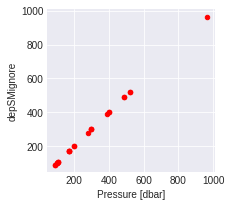

In [26]:
# Sanity check - does the Pressure (depth from trap file) match the Depth (from cast file)?

fig, ax = plt.subplots(figsize=(3, 3))

P2_join.plot(ax = ax, kind='scatter', x='Pressure [dbar]', y='depSMignore', c='Red');

In [27]:
import ctd


castP3 = ctd.from_cnv("/home/millieginty/Documents/git-repos/2017-etnp/notebooks/python-ctd/St22_P3_cast77-align-cellTM-derive-bin-MD.cnv")
downP3, upP3 = castP3.split()

downP3.reset_index(inplace=True)

# delete the scan, nbin, and flag columns

del downP3['scan']
#del downP3['nbin']
del downP3['flag']

downP3.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/St22_P3_cast77-align-cellTM-derive-bin-MD.csv")

# read as a df again

downP3_fix = pd.read_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/ctd/St22_P3_cast77-align-cellTM-derive-bin-MD_fix.csv", index_col = 'Pressure [dbar]')

downP3_fix.head()

,timeS,longitude,latitude,depSMignore,t090C,t190C,c0uS/cm,c1S/m,flECO-AFL,CStarAt0,...,sbeox0V,sbeox1V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mm/L,sbeox1Mm/L,sbeox0PS,sbeox1PS
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
2.0,13.310,-109.90011,21.99015,2,27.6779,27.6375,55418,5.549558,0.0916,0.1024,...,2.3281,2.3149,34.6688,34.7535,22.2505,22.3274,196.937,206.722,97.150,101.958
3.0,21.488,-109.90010,21.99014,3,27.6763,27.6360,55417,5.549479,0.0971,0.1021,...,2.3289,2.3175,34.6688,34.7538,22.2512,22.3281,197.417,206.695,97.385,101.942
4.0,22.717,-109.90010,21.99014,4,27.6768,27.6366,55418,5.549571,0.0952,0.1028,...,2.3315,2.3134,34.6688,34.7537,22.2510,22.3279,197.303,206.481,97.329,101.838
5.0,25.430,-109.90010,21.99014,5,27.6773,27.6372,55418,5.549645,0.0880,0.1019,...,2.3300,2.3137,34.6687,34.7535,22.2508,22.3276,196.840,206.721,97.102,101.957
6.0,27.675,-109.90010,21.99014,6,27.6793,27.6399,55421,5.550008,0.0883,0.1018,...,2.3247,2.3155,34.6689,34.7537,22.2505,22.3270,196.399,206.966,96.887,102.082


In [28]:
# Merge station flux and station cast dataframes on their indices

P3_join = P3_2019.merge(downP3_fix,on='Pressure [dbar]')

# Save to csv and fill empty cells

P3_join.to_csv("/home/millieginty/Documents/git-repos/2017-etnp/data/flux/KM_2019_P3_cast_trap_join.csv", na_rep='NULL')

P3_join.head()

,Station,Year,Depth (m),Pressure [dbar],Trap type,Flux (mg/m2/day),C:N organic,Org C flux (umol C/m2/day),Protein flux (ug/m2/day),Carbon protein flux (umol C/m2/day),...,sbeox0V,sbeox1V,sal00,sal11,sigma-�00,sigma-�11,sbeox0Mm/L,sbeox1Mm/L,sbeox0PS,sbeox1PS
0,P3,2019.0,170.0,170.0,Hybrid,7.753196,NaN,NaN,NaN,NaN,...,0.5171,0.5279,34.7153,34.8023,26.2908,26.3647,3.578,3.652,1.333,1.361
1,P3,2019.0,170.0,170.0,Hybrid,14.629847,13.182667,100.393484,202.548308,2.017544,...,0.5171,0.5279,34.7153,34.8023,26.2908,26.3647,3.578,3.652,1.333,1.361
2,P3,2019.0,570.0,570.0,Hybrid,3.662264,NaN,NaN,NaN,NaN,...,0.5024,0.5126,34.5332,34.6131,27.0371,27.1038,1.069,1.134,0.355,0.376
3,P3,2019.0,570.0,570.0,Hybrid,41.664112,7.298795,15.926666,52.539229,3.298822,...,0.5024,0.5126,34.5332,34.6131,27.0371,27.1038,1.069,1.134,0.355,0.376
4,P3,2019.0,570.0,570.0,Hybrid,9.726177,NaN,NaN,NaN,NaN,...,0.5024,0.5126,34.5332,34.6131,27.0371,27.1038,1.069,1.134,0.355,0.376


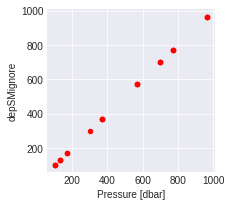

In [29]:
# Sanity check - does the Pressure (depth from trap file) match the Depth (from cast file)?

fig, ax = plt.subplots(figsize=(3, 3))

P3_join.plot(ax = ax, kind='scatter', x='Pressure [dbar]', y='depSMignore', c='Red');

In [30]:
def make_patch_spines_invisible(ax):
    
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

# P2

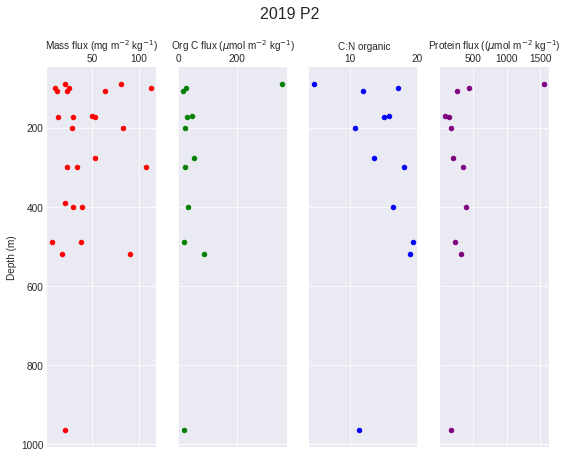

In [31]:
# Four-panel plot

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True, figsize=(9, 7))

fig2.suptitle('2019 P2', fontsize=16, y = 1.0)

# Mass flux

P2_2019.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Pressure [dbar]', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P2_2019.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P2_2019.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P2_2019.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y='Pressure [dbar]', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

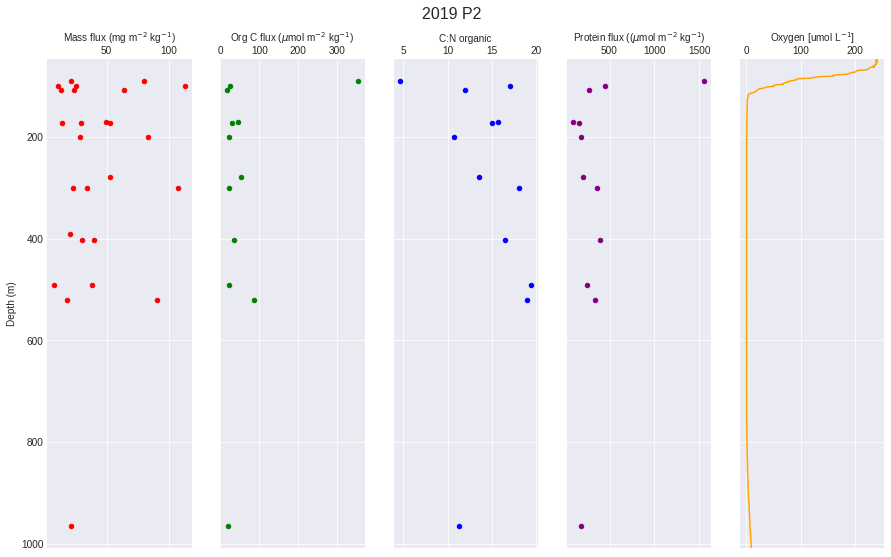

In [44]:
# Five-panel plot

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(15,9))

fig2.suptitle('2019 P2', fontsize=16, y = 0.96)

# Mass flux

P2_2019.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Pressure [dbar]', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P2_2019.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P2_2019.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P2_2019.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y='Pressure [dbar]', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# Chem profiles

downP2.plot(ax = ax6, kind='line', x='sbeox1Mm/L', y='depSMignore', c='Orange') 
ax6.set_xlabel('Oxygen [umol L$^{-1}$]')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax6.get_legend().remove()
ax6.grid(True)

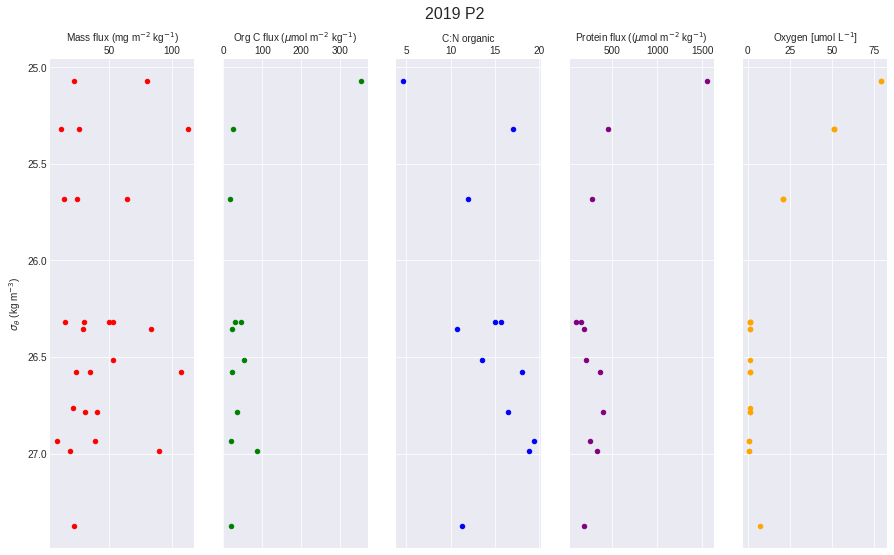

In [43]:
# plot flux with density using the merged cast and trap file

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(15,9))

fig2.suptitle('2019 P2', fontsize=16, y = 0.96)

# Mass flux

P2_join.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y= 'sigma-�00', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P2_join.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y= 'sigma-�00', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P2_join.plot(ax = ax4, kind='scatter', x='C:N organic', y= 'sigma-�00', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P2_join.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y= 'sigma-�00', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# Chem profiles

P2_join.plot(ax = ax6, kind='scatter', x='sbeox1Mm/L', y= 'sigma-�00', c='Orange')
ax6.set_xlabel('Oxygen [umol L$^{-1}$]')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax6.get_legend().remove()
ax6.grid(True);

# P3

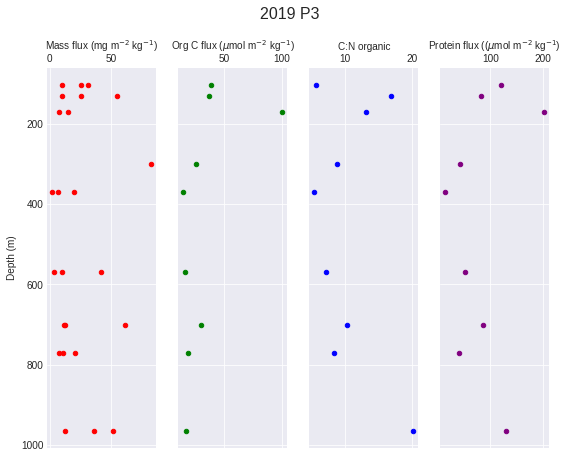

In [45]:
# Four-panel plot

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5) = plt.subplots(1,4,sharey=True, figsize=(9, 7))

fig2.suptitle('2019 P3', fontsize=16, y = 1.0)

# Mass flux

P3_2019.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Pressure [dbar]', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P3_2019.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P3_2019.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P3_2019.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y='Pressure [dbar]', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

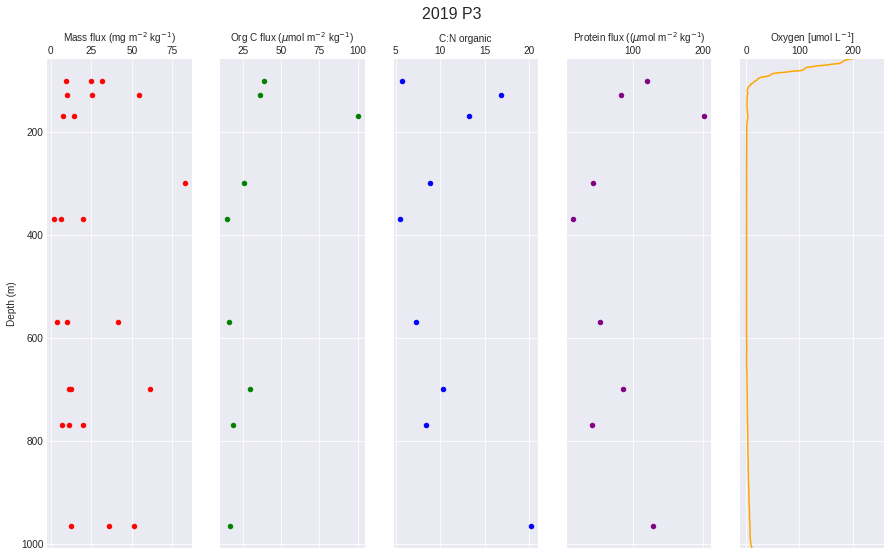

In [46]:
# Five-panel plot

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(15,9))

fig2.suptitle('2019 P3', fontsize=16, y = 0.96)

# Mass flux

P3_2019.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y='Pressure [dbar]', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel('Depth (m)')
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P3_2019.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y='Pressure [dbar]', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P3_2019.plot(ax = ax4, kind='scatter', x='C:N organic', y='Pressure [dbar]', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P3_2019.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y='Pressure [dbar]', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# Chem profiles

downP3.plot(ax = ax6, kind='line', x='sbeox1Mm/L', y='depSMignore', c='Orange') 
ax6.set_xlabel('Oxygen [umol L$^{-1}$]')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax6.get_legend().remove()
ax6.grid(True)

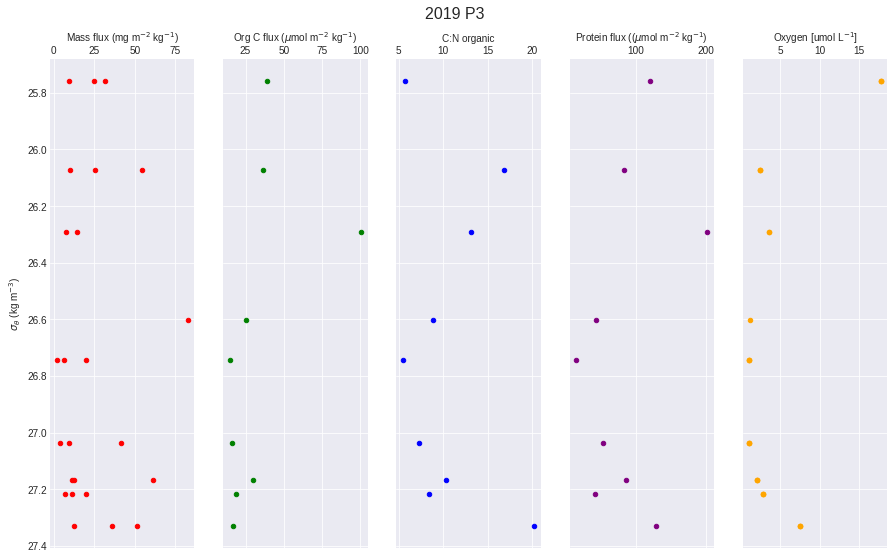

In [47]:
# plot flux with density using the merged cast and trap file

from matplotlib import style
style.use("seaborn-darkgrid")

fig2, (ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,5,sharey=True, figsize=(15,9))

fig2.suptitle('2019 P3', fontsize=16, y = 0.96)

# Mass flux

P3_join.plot(ax = ax2, kind='scatter', x='Flux (mg/m2/day)', y= 'sigma-�00', c='Red')
#ax2.plot(temp,depth,'o-')
ax2.set_ylabel(r"$\sigma_{\theta}$ (kg m$^{-3}$)")
ax2.set_ylim(ax2.get_ylim()[::-1]) #this reverses the yaxis (i.e. deep at the bottom)
ax2.set_xlabel('Mass flux (mg m$^{-2}$ kg$^{-1}$)')
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax2.grid(True)

# Organic carbon flux

P3_join.plot(ax = ax3, kind='scatter', x='Org C flux (umol C/m2/day)', y= 'sigma-�00', c='Green')
#ax3.plot(salt,depth,'o-r')
ax3.set_xlabel('Org C flux ($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax3.yaxis.set_visible(False) # This erases the y ticks
ax3.grid(True)

# CN of organic matter

P3_join.plot(ax = ax4, kind='scatter', x='C:N organic', y= 'sigma-�00', c='Blue')
#ax4.plot(fluo,depth,'o-g')
ax4.set_xlabel('C:N organic')
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax4.yaxis.set_visible(False) # This erases the y ticks
ax4.grid(True)

# Protein flux

P3_join.plot(ax = ax5, kind='scatter', x='Protein flux (ug/m2/day)', y= 'sigma-�00', c='Purple')
#ax4.plot(fluo,depth,'o-g')
ax5.set_xlabel('Protein flux (($\mu$mol m$^{-2}$ kg$^{-1}$)')
ax5.xaxis.set_label_position('top') # this moves the label to the top
ax5.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax5.yaxis.set_visible(False) # This erases the y ticks
ax5.grid(True)

# Chem profiles

P3_join.plot(ax = ax6, kind='scatter', x='sbeox1Mm/L', y= 'sigma-�00', c='Orange')
ax6.set_xlabel('Oxygen [umol L$^{-1}$]')
ax6.xaxis.set_label_position('top') # this moves the label to the top
ax6.xaxis.set_ticks_position('top') # this moves the ticks to the top
#ax6.get_legend().remove()
ax6.grid(True);